# TL;DR
1. simulated skewed data (1) lognormal (2) random drop values to be zero as zero-inflated
2. compared thearitical mean/var with sampled mean, var. When sample size is not enough, the acutal var is actuall lower than theory.
3. with all three methods to compute CI, for ratio change
3. computed the sample size needed for small MDE.
4. with the right sample size(very large), redo confidence interval, 

In [35]:
# Auto-reload modules
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
# independent project
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../..')))
import data

from data.gen_sample_ab import generate_ab_data, plot_ab_distributions


In [65]:
from utils.utils_ab_test import calculate_ratio_confidence_intervals, calculate_sample_size

In [ ]:

#plot_ab_distributions(df[df['value']>0])
#df.groupby('group').agg({'value': ['mean', 'std', 'size','max']})



Theoretical Statistics:
Note: Theoretical statistics before applying bounds:
Control Group - Mean: 9.75, Std: 79.92
Treatment Group - Mean: 9.84, Std: 80.72



Theoretical Statistics:
Note: Theoretical statistics before applying bounds:
Control Group - Mean: 9.75, Std: 79.92
Treatment Group - Mean: 9.84, Std: 80.72


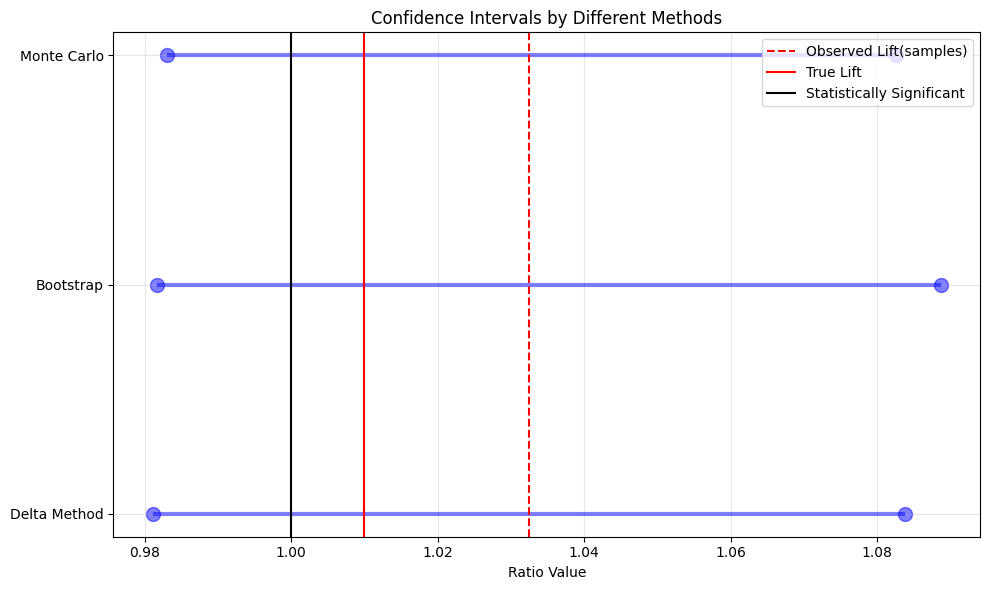

{'ratio': 1.0324653022792267,
 'delta_method_ci': (0.9811243733480915, 1.0838062312103618),
 'bootstrap_ci': array([0.98173853, 1.08864009]),
 'monte_carlo_ci': array([0.98303122, 1.08260332])}

In [69]:

true_relative_diff = 0.01



# df= generate_ab_data(
#         n_samples=100000,
#         data_type='skewed',
#         control_mean=0.5,  # mean parameter for log-normal
#         treatment_relative_effect=true_relative_diff,
#         sigma=2,
#         zero_prob=0.2,
#         lower_bound=-float('inf'),
#         upper_bound=float('inf'),
#         random_state=42
#     )

df= generate_ab_data(
        n_samples=100000,
        data_type='skewed',
        control_mean=0.5,  # mean parameter for log-normal
        treatment_relative_effect=true_relative_diff,
        sigma=2,
        zero_prob=0.2,
        lower_bound=-float('inf'),
        upper_bound=float('inf'),
        random_state=42
    )

results = calculate_ratio_confidence_intervals(df, value_col = 'value')
import matplotlib.pyplot as plt

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Data preparation
methods = ['Delta Method', 'Bootstrap', 'Monte Carlo']
lower_bounds = [
    results['delta_method_ci'][0],
    results['bootstrap_ci'][0],
    results['monte_carlo_ci'][0]
]
upper_bounds = [
    results['delta_method_ci'][1], 
    results['bootstrap_ci'][1],
    results['monte_carlo_ci'][1]
]

# Plot
y_pos = range(len(methods))
ax.hlines(y=y_pos, xmin=lower_bounds, xmax=upper_bounds, color='blue', alpha=0.5, linewidth=3)
ax.scatter(lower_bounds, y_pos, color='blue', alpha=0.5, s=100)
ax.scatter(upper_bounds, y_pos, color='blue', alpha=0.5, s=100)

# Add vertical line for the ratio
ax.axvline(x=results['ratio'], color='red', linestyle='--', label='Observed Lift(samples)')
ax.axvline(x=true_relative_diff+1, color='red', linestyle='-', label='True Lift')
ax.axvline(x=1, color='black', linestyle='-', label='Statistically Significant')

# Customize plot
ax.set_yticks(y_pos)
ax.set_yticklabels(methods)
ax.set_xlabel('Ratio Value')
ax.set_title('Confidence Intervals by Different Methods')
ax.grid(True, alpha=0.3)
ax.legend()

plt.tight_layout()
plt.show()

# Also display the numerical results
results

In [76]:
calculate_sample_size(baseline_metric = 9, variance = 79*79,
                       mde_relative=true_relative_diff, metric_type='continuous', 
                         alpha=0.05, power=0.8)

12095027


Theoretical Statistics:
Note: Theoretical statistics before applying bounds:
Control Group - Mean: 9.75, Std: 79.92
Treatment Group - Mean: 9.84, Std: 80.72


Running monte_carlo_ci: 100%|██████████| 1000/1000 [00:00<00:00, 507907.97it/s]


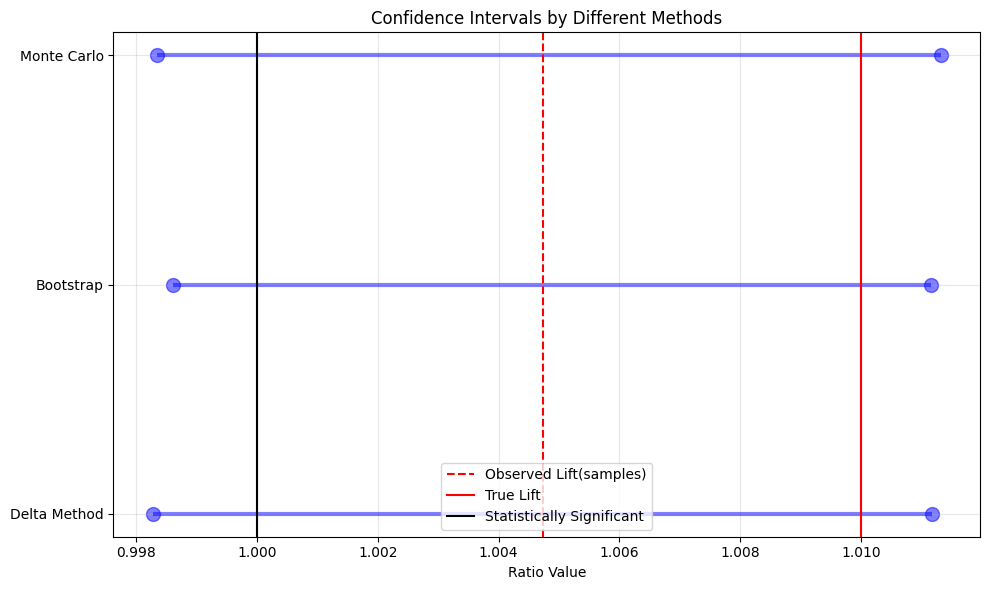

{'ratio': 1.0047288955138087,
 'delta_method_ci': (0.9982747009287487, 1.0111830900988688),
 'bootstrap_ci': array([0.99860191, 1.01116442]),
 'monte_carlo_ci': array([0.99834221, 1.01131764])}

In [77]:

true_relative_diff = 0.01



# df= generate_ab_data(
#         n_samples=100000,
#         data_type='skewed',
#         control_mean=0.5,  # mean parameter for log-normal
#         treatment_relative_effect=true_relative_diff,
#         sigma=2,
#         zero_prob=0.2,
#         lower_bound=-float('inf'),
#         upper_bound=float('inf'),
#         random_state=42
#     )

df= generate_ab_data(
        n_samples=12095027,
        data_type='skewed',
        control_mean=0.5,  # mean parameter for log-normal
        treatment_relative_effect=true_relative_diff,
        sigma=2,
        zero_prob=0.2,
        lower_bound=-float('inf'),
        upper_bound=float('inf'),
        random_state=42
    )

results = calculate_ratio_confidence_intervals(df, value_col = 'value')
import matplotlib.pyplot as plt

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Data preparation
methods = ['Delta Method', 'Bootstrap', 'Monte Carlo']
lower_bounds = [
    results['delta_method_ci'][0],
    results['bootstrap_ci'][0],
    results['monte_carlo_ci'][0]
]
upper_bounds = [
    results['delta_method_ci'][1], 
    results['bootstrap_ci'][1],
    results['monte_carlo_ci'][1]
]

# Plot
y_pos = range(len(methods))
ax.hlines(y=y_pos, xmin=lower_bounds, xmax=upper_bounds, color='blue', alpha=0.5, linewidth=3)
ax.scatter(lower_bounds, y_pos, color='blue', alpha=0.5, s=100)
ax.scatter(upper_bounds, y_pos, color='blue', alpha=0.5, s=100)

# Add vertical line for the ratio
ax.axvline(x=results['ratio'], color='red', linestyle='--', label='Observed Lift(samples)')
ax.axvline(x=true_relative_diff+1, color='red', linestyle='-', label='True Lift')
ax.axvline(x=1, color='black', linestyle='-', label='Statistically Significant')

# Customize plot
ax.set_yticks(y_pos)
ax.set_yticklabels(methods)
ax.set_xlabel('Ratio Value')
ax.set_title('Confidence Intervals by Different Methods')
ax.grid(True, alpha=0.3)
ax.legend()

plt.tight_layout()
plt.show()

# Also display the numerical results
results